In [4]:
pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import csv
import torch
from transformers import pipeline

def load_model():
    try:
        
        print("Вчитување на модел...")
        sentiment_analyzer = pipeline(
            "sentiment-analysis",
            model="nlptown/bert-base-multilingual-uncased-sentiment",
            tokenizer="nlptown/bert-base-multilingual-uncased-sentiment"
        )
        return sentiment_analyzer
    except Exception as e:
        print(f"Грешка при вчитување на моделот: {str(e)}")
        raise

def analyze_sentiment(text, analyzer):
    try:
        result = analyzer(text)
        
        
        print(f"\nТекст: {text}")
        print(f"Резултат: {result}")
        
        
        score = int(result[0]['label'][0])
        
        if score <= 2:
            return "Negative", "Sell"
        elif score == 3:
            return "Neutral", "Hold"
        else:
            return "Positive", "Buy"
            
    except Exception as e:
        print(f"Грешка при анализа: {str(e)}")
        return "Error", "Hold"

def load_news_from_csv(filename="news.csv"):
    news_items = []
    try:
        with open(filename, mode='r', encoding='utf-8') as file:
            reader = csv.DictReader(file)
            for row in reader:
                news_items.append({
                    "date": row["date"],
                    "title": row["title"],
                    "link": row["link"]
                })
        print(f"Вчитани {len(news_items)} вести од {filename}")
    except FileNotFoundError:
        print(f"Фајлот '{filename}' не е пронајден.")
    return news_items

def analyze_news_sentiments(news_items, output_filename="analyzed_newsssss.csv"):
    print("\nЗапочнувам анализа на вестите...")
    
    try:
        sentiment_analyzer = load_model()
    except Exception as e:
        print("Не можам да го вчитам моделот. Проверете ги инсталираните библиотеки.")
        return
    
    analyzed_news = []
    results_count = {"Positive": 0, "Negative": 0, "Neutral": 0, "Error": 0}
    
    for i, news in enumerate(news_items, 1):
        title = news["title"]
        print(f"\n[{i}/{len(news_items)}] Анализирам вест:")
        
        sentiment, recommendation = analyze_sentiment(title, sentiment_analyzer)
        results_count[sentiment] += 1
            
        analyzed_news.append({
            "date": news["date"],
            "title": title,
            "link": news["link"],
            "sentiment": sentiment,
            "recommendation": recommendation
        })
        
     
        if i % 100 == 0:
            with open(output_filename, mode='w', encoding='utf-8', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=["date", "title", "link", "sentiment", "recommendation"])
                writer.writeheader()
                writer.writerows(analyzed_news)
            print(f"\nМеѓурезултати зачувани после {i} анализирани вести")
        
    
    total = len(news_items)
    print("\n" + "="*50)
    print("ФИНАЛНА СТАТИСТИКА:")
    print(f"Вкупно анализирани: {total}")
    for sentiment, count in results_count.items():
        percentage = (count/total*100) if total > 0 else 0
        print(f"{sentiment}: {count} ({percentage:.1f}%)")

   
    with open(output_filename, mode='w', encoding='utf-8', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=["date", "title", "link", "sentiment", "recommendation"])
        writer.writeheader()
        writer.writerows(analyzed_news)
    
    print(f"\nРезултатите се зачувани во '{output_filename}'")

if __name__ == "__main__":
    news_items = load_news_from_csv("news.csv")
    if news_items:
        analyze_news_sentiments(news_items)


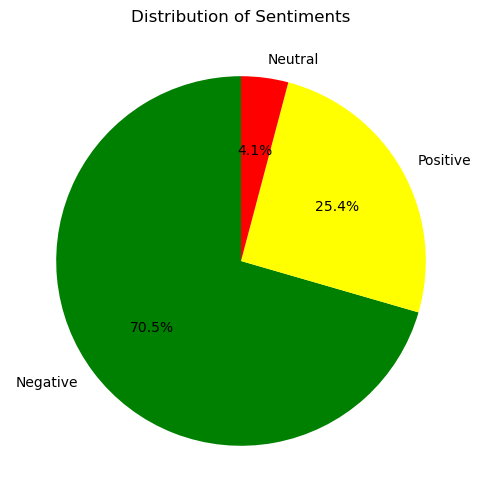

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("analyzed_news.csv")


sentiment_counts = data["sentiment"].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])
plt.title("Distribution of Sentiments")
plt.show()
